# Tethyss QAQC 2 - Flag by Tag

The aim of this notebook is to complete a qaqc check on Tethys/Tethys Engineering, which flags enties that exceed a threshold of a particular number of tags associated with them.

5 stressors / 5 receptors / 8 tags

### Setup

In [1]:
import pandas as pd
import primrea.core

primre_data = primrea.core.primrea_data()

### Dev

In [2]:
tethys_df_core = primre_data.tethys_core
tethys_df_tags = primre_data.tethys_tags

In [3]:
tethys_df_tags['entry_id'].value_counts()

129768     34
191608     29
5793       23
1838447    21
5749       20
           ..
3539        1
40989       1
3540        1
3541        1
2751        1
Name: entry_id, Length: 4248, dtype: int64

In [4]:
tethys_tags_count_df = pd.DataFrame(tethys_df_tags['entry_id'].value_counts())
tethys_tags_count_df

,entry_id
129768,34
191608,29
5793,23
1838447,21
5749,20
...,...
3539,1
40989,1
3540,1
3541,1


In [5]:
tethys_tags_count_df = tethys_tags_count_df.reset_index()
tethys_tags_count_df

,index,entry_id
0,129768,34
1,191608,29
2,5793,23
3,1838447,21
4,5749,20
...,...,...
4243,3539,1
4244,40989,1
4245,3540,1
4246,3541,1


In [6]:
tethys_tags_count_df = tethys_tags_count_df.rename(columns={'index': 'entry_id', 'entry_id': 'num_tags'})
tethys_tags_count_df

,entry_id,num_tags
0,129768,34
1,191608,29
2,5793,23
3,1838447,21
4,5749,20
...,...,...
4243,3539,1
4244,40989,1
4245,3540,1
4246,3541,1


In [7]:
# Chart
chart_df = tethys_tags_count_df['num_tags'].value_counts()
chart_df = chart_df.reset_index()
chart_df = chart_df.rename(columns={'index': 'num_tags', 'num_tags': 'obs'})
chart_df = chart_df.sort_values('num_tags', ascending=True)
chart_df

,num_tags,obs
3,1,591
2,2,785
0,3,1517
1,4,788
4,5,246
5,6,119
7,7,35
6,8,41
9,9,20
8,10,28


In [8]:
import matplotlib.pyplot as plt

In [9]:
x = list(chart_df['num_tags'])
y = list(chart_df['obs'])

In [10]:
x.insert(0, 0)
y.insert(0, 0)

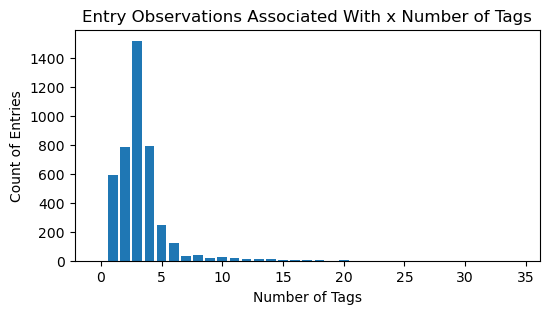

In [11]:
#plt.rcParams['figure.dpi'] = 300

fig, ax = plt.subplots()
ps = ax.bar(x, y, )
#pe, = ax.plot(x, z, label = 'Project End')
#pa, = ax.plot(x, a, label = 'Projects Active')
ax.set_title('Entry Observations Associated With x Number of Tags')
ax.set_xlabel('Number of Tags')
ax.set_ylabel('Count of Entries')
#ax.legend(['Project Start', 'Project End', 'Projects Active'])
#ax.legend(handles = [ps, pe, pa])
fig.set_size_inches([6,3])
plt.savefig('Observations vs tags.png', bbox_inches='tight')
#plt.show()

In [21]:
tags_10_plus = chart_df[chart_df['num_tags']>=10]['obs'].sum()
tags_9_plus = chart_df[chart_df['num_tags']>=9]['obs'].sum()
tags_8_plus = chart_df[chart_df['num_tags']>=8]['obs'].sum()
tags_7_plus = chart_df[chart_df['num_tags']>=7]['obs'].sum()
tags_6_plus = chart_df[chart_df['num_tags']>=6]['obs'].sum()
tags_5_plus = chart_df[chart_df['num_tags']>=5]['obs'].sum()
print(f'Number of entries having 10+ tags : {tags_10_plus}\nNumber of entries having 9+ tags  : {tags_9_plus}\nNumber of entries having 8+ tags  : {tags_8_plus}\nNumber of entries having 7+ tags  : {tags_7_plus}\nNumber of entries having 6+ tags  : {tags_6_plus}\nNumber of entries having 5+ tags  : {tags_5_plus}')

Number of entries having 10+ tags : 106
Number of entries having 9+ tags  : 126
Number of entries having 8+ tags  : 167
Number of entries having 7+ tags  : 202
Number of entries having 6+ tags  : 321
Number of entries having 5+ tags  : 567


In [24]:
tethys_df_tags['tag'].unique()

array(['Environment', 'Human Dimensions',
       'Environmental Impact Assessment', 'Noise', 'Legal & Policy',
       'Physical Environment', 'Changes in Flow', 'Birds', 'Fish',
       'Demersal Fish', 'EMF', 'Water Quality', 'Climate Change',
       'Recreation & Tourism', 'Social & Economic Data',
       'Stakeholder Engagement', 'Attraction', 'Avoidance', 'Collision',
       'Displacement', 'Sediment Transport', 'Marine Spatial Planning',
       'Ecosystem Processes', 'Habitat Change', 'Fisheries',
       'Pelagic Fish', 'Environmental Justice', 'Invertebrates',
       'Seabirds', 'Marine Mammals', 'Cetaceans', 'Pinnipeds',
       'Waterfowl', 'Visual Impacts', 'Life Cycle Assessment',
       'Navigation', 'Bats', 'Lighting', 'Raptors', 'Chemicals',
       'Reptiles', 'Entanglement', 'Shorebirds', 'Terrestrial Mammals',
       'Ground-Nesting Birds', 'Passerines', 'Sea Turtles'], dtype=object)

#### Example Output

In [28]:
a = tethys_tags_count_df[tethys_tags_count_df['num_tags']>=10]
a

,entry_id,num_tags
0,129768,34
1,191608,29
2,5793,23
3,1838447,21
4,5749,20
...,...,...
101,5804,10
102,5833,10
103,2828,10
104,5848,10


In [33]:
b = a.merge(tethys_df_core, how='inner', on='entry_id')
b

,entry_id,num_tags,originationDate,modifiedDate,URI,landingPage,sourceURL,title,description,signatureProject
0,129768,34,2009-12-01,2024-01-22 09:24:45,https://tethys.pnnl.gov/node/129768,https://tethys.pnnl.gov/publications/strategic...,,Strategic Environmental Assessment (SEA) of Of...,This Environmental Report presents the results...,[]
1,191608,29,2020-09-30,2024-05-10 05:59:48,https://tethys.pnnl.gov/node/191608,https://tethys.pnnl.gov/publications/state-of-...,,OES-Environmental 2020 State of the Science Re...,The OES-Environmental 2020 State of the Scienc...,[]
2,5793,23,2024-04-19,2024-04-26 10:49:50,https://tethys.pnnl.gov/node/5793,https://tethys.pnnl.gov/project-sites/sem-rev-...,https://sem-rev.ec-nantes.fr/,SEM-REV Sea Test Site,The test site occupies approximately a 1 km2 t...,[]
3,1838447,21,2022-07-15,2024-01-22 08:44:52,https://tethys.pnnl.gov/node/1838447,https://tethys.pnnl.gov/publications/practical...,https://www.frontiersin.org/articles/10.3389/f...,Practical Approaches for Providing Empirical D...,Persisting knowledge gaps relating to the ecol...,[]
4,1838447,21,2022-07-15,2024-01-22 08:44:52,https://tethys.pnnl.gov/node/1838447,https://tethys.pnnl.gov/publications/practical...,https://www.frontiersin.org/articles/10.3389/f...,Practical Approaches for Providing Empirical D...,Persisting knowledge gaps relating to the ecol...,[]
...,...,...,...,...,...,...,...,...,...,...
105,5804,10,2014-07-04,2023-12-08 12:52:58,https://tethys.pnnl.gov/node/5804,https://tethys.pnnl.gov/project-sites/wave-rid...,http://www.waveriderenergy.com.au/,Wave Rider Wave Energy Pilot Plant,The Wave Rider™ is an offshore wave energy con...,[]
106,5833,10,2019-03-28,2023-12-08 12:28:14,https://tethys.pnnl.gov/node/5833,https://tethys.pnnl.gov/project-sites/scotrene...,https://orbitalmarine.com/technology/,ScotRenewables SR2000 at EMEC,Orbital Marine Power (formerly Scotrenewables)...,[]
107,2828,10,2015-10-06,2024-01-22 10:04:04,https://tethys.pnnl.gov/node/2828,https://tethys.pnnl.gov/publications/wales-mar...,http://gov.wales/docs/drah/publications/151008...,Wales' Marine Evidence Report,The purpose of marine planning under the Marin...,[]
108,5848,10,2022-10-21,2023-12-07 11:24:54,https://tethys.pnnl.gov/node/5848,https://tethys.pnnl.gov/project-sites/wave-swe...,https://www.waveswell.com,Wave Swell Energy King Island Project,The Wave Swell Energy (WSE) King Island projec...,[]


In [34]:
b['URI']

0       https://tethys.pnnl.gov/node/129768
1       https://tethys.pnnl.gov/node/191608
2         https://tethys.pnnl.gov/node/5793
3      https://tethys.pnnl.gov/node/1838447
4      https://tethys.pnnl.gov/node/1838447
                       ...                 
105       https://tethys.pnnl.gov/node/5804
106       https://tethys.pnnl.gov/node/5833
107       https://tethys.pnnl.gov/node/2828
108       https://tethys.pnnl.gov/node/5848
109     https://tethys.pnnl.gov/node/249939
Name: URI, Length: 110, dtype: object

In [40]:
b['entry_id'].value_counts()

1838447    3
1284878    2
1630709    2
2156       1
1560530    1
          ..
5797       1
5747       1
5836       1
643163     1
249939     1
Name: entry_id, Length: 106, dtype: int64

In [41]:
tethys_df_core['URI'].is_unique

False

In [47]:
tethys_df_core['entry_id'].is_unique

False

In [49]:
tethys_df_core['URI'].value_counts()

https://tethys.pnnl.gov/node/1838447    3
https://tethys.pnnl.gov/node/1630709    2
https://tethys.pnnl.gov/node/1618730    2
https://tethys.pnnl.gov/node/1560806    2
https://tethys.pnnl.gov/node/1284879    2
                                       ..
https://tethys.pnnl.gov/node/3659       1
https://tethys.pnnl.gov/node/3661       1
https://tethys.pnnl.gov/node/3662       1
https://tethys.pnnl.gov/node/3665       1
https://tethys.pnnl.gov/node/2079485    1
Name: URI, Length: 4248, dtype: int64

In [42]:
tethys_e_df_core = primre_data.tethys_e_core

In [43]:
tethys_e_df_core['URI'].is_unique

False

In [48]:
tethys_e_df_core['entry_id'].is_unique

False

In [46]:
tethys_e_df_core['URI'].value_counts()

https://tethys-engineering.pnnl.gov/node/10830    8
https://tethys-engineering.pnnl.gov/node/1265     8
https://tethys-engineering.pnnl.gov/node/20746    7
https://tethys-engineering.pnnl.gov/node/10835    6
https://tethys-engineering.pnnl.gov/node/10658    6
                                                 ..
https://tethys-engineering.pnnl.gov/node/3024     1
https://tethys-engineering.pnnl.gov/node/3023     1
https://tethys-engineering.pnnl.gov/node/3022     1
https://tethys-engineering.pnnl.gov/node/3021     1
https://tethys-engineering.pnnl.gov/node/18796    1
Name: URI, Length: 8173, dtype: int64